# Исследование тарифных планов телекоммуникационной компании "Мегалайн"

## Актуальность проекта

<a class="anchor" id="bullet_1"></a>

### Цель исследования

Проанализировать клиентское поведение абонентов компании "Мегалайн", использующих один из двух тарифов: "Смарт" или "Ультра". Сделать выводы о том, какой из тарифов более выгоден для Компании, а также предоставить коммерческому департаменту результаты исследования для дальнейших корректировок рекламных бюджетов.

### Описание

Для целей исследования в распоряжении есть данные о 500 пользователях Компании (включая имена, фамилии,даты подключения тарифов), информация о звонках, сообщениях и интернет-трафике пользователей, а также условия тарифных планов. 

В данном исследовании мы проанализируем поведение пользователей тарифных планов, рассчитаем помесячную выручку каждого клиента, а также проверим следующие гипотезы: 
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

<a id="bullet_3"></a>

### План исследования

* 1.[Актуальность проекта](#bullet_1)
    * 1.1 [Цель исследования](#bullet_1)
    * 1.2 [Описание](#bullet_3)
    * 1.3 [План исследования](#bullet_3)
* 2.[Изучение общей информации опредоставленных данных](#bullet_5)
* 3.[Предварительная обработка данных](#bullet_6)
* 4.[Расчет дохода от тарифных планов](#bullet_7)
    * 4.1[Количество звонков и израсходованных минут разговора по месяцам](#bullet_7)
    * 4.2[Количество сообщений для каждого абонента в месяц](#bullet_9)
    * 4.3[Объём израсходованного интернет трафика по месяцам](#bullet_10)
    * 4.4[Общая выручка с каждого абонента в месяц](#bullet_11)
    * 4.5[Описание клиентского поведения для пользователей разных тарифных планов](#bullet_8)
* 5.[Проверка гипотез](#bullet_12)
* 6.[Общий вывод](#bullet_2)

## Изучение общей информации о предоставленных данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

Прочитаем данные из файлов. Данные о клиентах сохраним в таблице df_users, о звонках - df_calls, о сообщениях - df_messages, об интернет трафике - df_internet, о тарифных планах - в таблице df_tariffs.

In [2]:
url_users = 'https://drive.google.com/file/d/1dPdVaKX94DllVOrvus4_KbTOGzEK6FH8/view?usp=sharing'
url_users_r = 'https://drive.google.com/uc?id=' + url_users.split('/')[-2]
url_calls = 'https://drive.google.com/file/d/1a7ZuCpI2HyYK2b_evfPPZ0pi_MZHX_wa/view?usp=sharing'
url_calls_r = 'https://drive.google.com/uc?id=' + url_calls.split('/')[-2]
url_messages = 'https://drive.google.com/file/d/1o_EpQJ_d3ZdJf36AyRtz6C5CeipgMp1e/view?usp=sharing'
url_messages_r = 'https://drive.google.com/uc?id=' + url_messages.split('/')[-2]
url_internet = 'https://drive.google.com/file/d/1x0p2ZmxbKG1qRTAtTyWR0kwhD96-nWzY/view?usp=sharing'
url_internet_r = 'https://drive.google.com/uc?id=' + url_internet.split('/')[-2]
url_tariffs = 'https://drive.google.com/file/d/11dYJEq_hhYEOOsjOdcvyXmL9M24ti6tr/view?usp=sharing'
url_tariffs_r = 'https://drive.google.com/uc?id=' + url_tariffs.split('/')[-2]

In [3]:
df_users = pd.read_csv(url_users_r)
df_calls = pd.read_csv(url_calls_r)
df_messages = pd.read_csv(url_messages_r)
df_internet = pd.read_csv(url_internet_r)
df_tariffs = pd.read_csv(url_tariffs_r)

Изучим общую информацию о клиентах

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице представлено 500 записей. На первый взгляд таблица заполнена полностью, за исключением столбца _churn_date_ , который согласно описанию к файлу содержит дату отключения от тарифа, однако если отключения не было, то ячейка должна остаться пустой. 
В дальнейшей предобработке данных нужно будет заменить некоторые типы данных (например: дату регистрации _reg_date_ заменить на формат даты), а также проверить нет ли дублирующихся, но не уникальныхзначений в текстовых столбцах (например: _city_)

In [5]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Изучим общую информацию о тарифных планах

In [6]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Условия тарифных планов представлены в виде таблици корректно: нет пропусков, адекватные названия столбцов. Не требует дальнейшей предобработки. 

Изучим полноту предоставленной информации о звонках

In [7]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице о звонках предоставлена информация о более чем 202 тыс. звонков. На первый взгляд, пропусков нет, но есть звонки с длительностью 0. Нам предстоит выяснить природу таких коротких звонков, учитывая, что по условию тарифных планов округление происходит к большей целой минуте. 

In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице с данными о сообщениях представлено 123036 записей, пропусков не замечено. Но формат столбца _message_date_ необходимо будт поменять на формат даты.

In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [12]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице об использовании интернета представлено 149396 записей. Пропусков нет, но есть столбец _unnamed_, который вероятно, дублирует индексы таблицы - избавимся от него во время дальнейшей предобработки.

**Общий вывод**

Данные прочитаны из 5 таблиц. Данным треубется небольшая предобработка.

## Предварительная обработка данных

Для начала обработаем таблицу df_users. Проверим уникальность значений в столбцах _city_ и _tariff_

In [13]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [14]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Опасения о наличие задвоенных или не корректных значений в столбцах _city_ и _tariff_ не оправдались: данные записаны корректно.

Избавимся от пропущенных значений в столбце _churn_date_. В условиях проекта есть примечание, что значения в этом столбце есть только если абонент отписался от тарифного плана, если же он продолжает пользоваться, то в столбце ничего не должно быть. Поэтому пропуски оставим просто пустыми.

In [15]:
df_users['churn_date'].fillna('')

0                
1                
2                
3                
4                
          ...    
495              
496              
497              
498    2018-10-25
499              
Name: churn_date, Length: 500, dtype: object

Заменим тип данных в столбцах _churn_date_ и _reg_date_ на формат даты.

In [16]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [17]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

---
В таблице с данными о телефонных звонках изменим тип данных в столбце _call_date_ на дату. 

In [18]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [19]:
df_calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

Мы выяснили, что временной ряд, представленный в выборке ограничивается целым 2018 годом. То есть когда будем изучать данные по месяцам, не нужно будет брать во внимание год.

В столбце _duration_ представлена информация о длительности телефонного разговора в минутах. При этом есть несколько замечаний к данным:
1) есть достаточно большое количество отметок с длительностью звонков 0.0. Вероятнее всего, это неотвеченные вызовы. То есть звонок состоялся, но так как самого разговора не было, то и длительность отмечена как 0. Изучим как много таких звонков, какую долю они создают от общего числа звонков.
2) по условиям тарифного плана не полная минута разговора округляется в большу сторону. А в столбце есть данные с дробными остатками. Чтобы в дальнейшем брать в расчет длительность звонка, в соответсвии с тарифным планом, округлим значения до большего целого. 

In [20]:
len(df_calls.query('duration == 0'))

39613

In [21]:
zero_calls_share = len(df_calls.query('duration == 0')) / len(df_calls)
zero_calls_share

0.19551644316336553

В нашей выборке представленно более 39 000 звонков с 0 длительностью - это 19.5 % выборки. В выводах к настоящему исследованию мы укажем, что каждый 5 звонок является неотвеченным. 

Построим график распределения длительности телефонных разговоров если мы оставим эти телефонные звонки в выборке, и если будем далее изучать выборку без них.

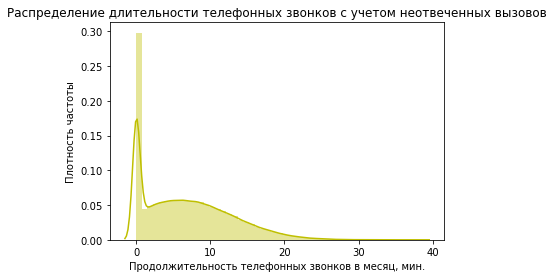

In [22]:
ax = sns.distplot(df_calls['duration'], color='y')
ax.set(xlabel='Продолжительность телефонных звонков в месяц, мин.', ylabel='Плотность частоты', title='Распределение длительности телефонных звонков с учетом неотвеченных вызовов')
fig = ax.get_figure()

In [23]:
df_real_calls = df_calls[df_calls['duration'] > 0]

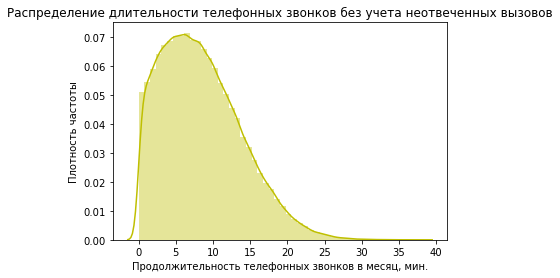

In [24]:
ax = sns.distplot(df_real_calls['duration'], color = 'y')
ax.set(xlabel='Продолжительность телефонных звонков в месяц, мин.', ylabel='Плотность частоты', title='Распределение длительности телефонных звонков без учета неотвеченных вызовов')
fig = ax.get_figure()

Большое количество неотвеченных звонков оказывает влияние на подсчет средних значений, поэтому мы примем во внимание, что почти 20% звонков с длительностью 0 минут, но для целей дальнейшего исследования мы не будем брать их в расчет.

In [25]:
df_calls.drop(df_calls[df_calls['duration'] == 0].index, inplace=True)

In [26]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls['duration'] = df_calls['duration'].astype('int')

---
В таблице с данными о сообщениях изменим тип данных в столбце _message_date_ изменим на дату

In [27]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

---
* В таблице с данными об интернет-трафике удалим задвоенный столбец _Unnamed: 0_.
* По условиям тарифного плана интернет-трафик также округляется до целого мегабайта. Поэтому округлим значения столбца _mb_used_ до большего целого значения.
* Тип данных в столбце _session_date_ изменим на тип дата

In [28]:
df_internet.drop(columns='Unnamed: 0')

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [29]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)
df_internet['mb_used']= df_internet['mb_used'].astype('int')

In [30]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [31]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int32         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.1+ MB


Предварительная оценка данных показала, что есть интернет сессии, с 0 длительностью. Если выразться точнее, то это сессии с потраченными 0 Мб.Посчитаем как много записей с таким значением в нашей выборке.

In [32]:
len(df_internet.query('mb_used == 0'))

19598

В нашей выборке 19598 записей. В дальнейшем такие 0 сессии могут повлиять на значение средних значений. Кроме того, если запись не несет информации о ее продолжительности, то не несет и какой-то дополнительной информации. Эти записи можем удалить. Тем более что для анализа у нас останется достаточная выборка в 130 000 записей.

In [33]:
df_internet.drop(df_internet[df_internet['mb_used'] == 0].index, inplace=True)

In [34]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    129798 non-null  int64         
 1   id            129798 non-null  object        
 2   mb_used       129798 non-null  int32         
 3   session_date  129798 non-null  datetime64[ns]
 4   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.4+ MB


In [35]:
df_internet['mb_used'].describe()

count    129798.000000
mean        426.581758
std         255.596114
min           1.000000
25%         228.000000
50%         401.000000
75%         593.000000
max        1725.000000
Name: mb_used, dtype: float64

---
Часть дальнейших расчетов будет вестись по месяцам. Поэтому в таблицы об использовании трафика, телефонных звонках и сообщениях добавим по столбцу с календарным месяцем. 

In [36]:
df_internet['i_month'] = df_internet['session_date'].dt.month
df_messages['m_month'] = df_messages['message_date'].dt.month
df_calls['c_month'] = df_calls['call_date'].dt.month

**Общий вывод**

Предоставленные данные были обработаны: типы данных для столбцов с датами были приведены в соответствие, округлили длительность звонков и интернет-сессий, чтобы они соответсвовали тарифному плану, убедились что текстовые столбцы не задублированны. Можем приступить к дальнейшим расчетам

## Расчет дохода от тарифных планов

### Количество звонков и израсходованных минут разговора по месяцам

Чтобы рассчитать какое количество минут было в рамках тарифного плана, а какое количество минут было израсходованно сверх запланированных в таблицу _df_calls_ добавим данные о тарифном плане каждого абонента (перенесем столбец из таблицы _df_users_), а затем добавим какое количество минут было запланированно, согласно тарифному плану (заполним данными из таблицы _df_tariffs). 

In [37]:
df_users_sub_c = df_users[['user_id', 'tariff']]

In [38]:
df_calls = df_calls.merge(df_users_sub_c, on='user_id', how='left')

In [39]:
df_tariffs_sub_c = df_tariffs[['tariff_name', 'minutes_included', 'rub_per_minute']]
df_calls = df_calls.merge(df_tariffs_sub_c, left_on='tariff', right_on='tariff_name', how='left')

In [40]:
df_calls.head()

,id,call_date,duration,user_id,c_month,tariff,tariff_name,minutes_included,rub_per_minute
0,1000_2,2018-06-11,3,1000,6,ultra,ultra,3000,1
1,1000_3,2018-09-21,14,1000,9,ultra,ultra,3000,1
2,1000_4,2018-12-15,6,1000,12,ultra,ultra,3000,1
3,1000_7,2018-08-22,19,1000,8,ultra,ultra,3000,1
4,1000_8,2018-09-15,19,1000,9,ultra,ultra,3000,1


Теперь на основе полученных данных сформируем сводную таблицу, которая продемонстрирует нам какое количество звонков и какой суммарной продолжительности совершил каждый абонент в месяц. Сводной таблице дадим название _df_calls_dur_ , а полученным столбцам дадим подходящие названия.

In [41]:
df_calls_dur = df_calls.pivot_table(index=['user_id', 'c_month'], values=['duration', 'tariff', 'minutes_included', 'rub_per_minute'], aggfunc={'duration':('count', 'sum'), 'tariff': 'first', 'minutes_included':'first', 'rub_per_minute':'first'})

In [42]:
df_calls_dur.head()

duration      minutes_included rub_per_minute tariff
                   count  sum            first          first  first
user_id c_month                                                     
1000    5             17  159             3000              1  ultra
        6             28  172             3000              1  ultra
        7             41  340             3000              1  ultra
        8             42  408             3000              1  ultra
        9             46  466             3000              1  ultra

In [43]:
df_calls_dur.columns = ['calls_count', 'sum_duration', 'minutes_included', 'rub_per_minute', 'tariff']

Рассчитаем количество минут разговора, потраченных сверх запланированного тарифным планом. Полученную информацию добавим в новый столбец _extra_minutes_. В столбец _extra_money_c_ рассчитаем и внесем размер дополнительного платежа в месяц за телефонные разговоры сверх тарифного плана.

In [44]:
df_calls_dur['extra_minutes'] = df_calls_dur['sum_duration'] - df_calls_dur['minutes_included']
df_calls_dur.loc[df_calls_dur['extra_minutes'] < 0, 'extra_minutes'] = 0

In [45]:
df_calls_dur['extra_money_c'] = df_calls_dur['extra_minutes'] * df_calls_dur['rub_per_minute']

In [46]:
df_calls_dur['extra_money_c'].describe()

count    3168.000000
mean       87.821023
std       220.567755
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2805.000000
Name: extra_money_c, dtype: float64

Метод describe показывает нам, что доплата за более длительные телефонные разговоры - это редкость. Более 3/4 абонентов не имеют необходимости доплачивать за дополнительные телефонные разговоры. Однако, максимальная доплата составила 2805 рублей. 

In [47]:
df_calls_dur.head()

calls_count  sum_duration  minutes_included  rub_per_minute  \
user_id c_month                                                                
1000    5                 17           159              3000               1   
        6                 28           172              3000               1   
        7                 41           340              3000               1   
        8                 42           408              3000               1   
        9                 46           466              3000               1   

                tariff  extra_minutes  extra_money_c  
user_id c_month                                       
1000    5        ultra              0              0  
        6        ultra              0              0  
        7        ultra              0              0  
        8        ultra              0              0  
        9        ultra              0              0

**Вывод**

Мы рассчитали и добавили информацию о том, сколько минут разговора израсходовал каждый абонент в месяц, а также рассчитали размер доплаты для тех абонентов, у кого были телефонные разговоры сверх тарифного плана.

### Количество сообщений для каждого абонента в месяц

Чтобы рассчитать какое количество сообщений было отправлено в рамках тарифного плана, а какое количество сообщений было отправлено сверх запланированных в таблицу _df_messages_ добавим данные о тарифном плане каждого абонента (перенесем столбец из таблицы _df_users_), а затем добавим какое количество сообщений было запланированно, согласно тарифному плану (заполним данными из таблицы _df_tariffs).

In [48]:
df_users_sub_m = df_users[['user_id', 'tariff']]

In [49]:
df_messages = df_messages.merge(df_users_sub_m, on='user_id', how='left')

In [50]:
df_tariffs_sub_m = df_tariffs[['tariff_name', 'messages_included', 'rub_per_message']]
df_messages = df_messages.merge(df_tariffs_sub_m, left_on='tariff', right_on='tariff_name', how='left')

In [51]:
df_messages.head()

,id,message_date,user_id,m_month,tariff,tariff_name,messages_included,rub_per_message
0,1000_0,2018-06-27,1000,6,ultra,ultra,1000,1
1,1000_1,2018-10-08,1000,10,ultra,ultra,1000,1
2,1000_2,2018-08-04,1000,8,ultra,ultra,1000,1
3,1000_3,2018-06-16,1000,6,ultra,ultra,1000,1
4,1000_4,2018-12-05,1000,12,ultra,ultra,1000,1


На основе объединенных данных сформируем сводную таблицу, где исследуем какое еоличество сообщений отправил каждый пользователь в месяц. Получим таблицу _df_messages_count_ .

In [52]:
df_messages_count = df_messages.pivot_table(index=['user_id', 'm_month'], values=['id', 'messages_included', 'rub_per_message', 'tariff'], aggfunc={'id':'count', 'messages_included':'first', 'rub_per_message':'first', 'tariff':'first'})

In [53]:
df_messages_count.head()

id  messages_included  rub_per_message tariff
user_id m_month                                               
1000    5        22               1000                1  ultra
        6        60               1000                1  ultra
        7        75               1000                1  ultra
        8        81               1000                1  ultra
        9        57               1000                1  ultra

In [54]:
df_messages_count.columns = ['messages_number', 'messages_included', 'rub_per_message', 'tariff']

Рассчитаем количество "перерасходованных" сообщений и дополнительную стоимость этих сообщений для каждого абонента в месяц (столбцы _extra_messages_ и _extra_money_m_ соответственно). 

In [55]:
df_messages_count['extra_messages'] = df_messages_count['messages_number'] - df_messages_count['messages_included']
df_messages_count.loc[df_messages_count['extra_messages'] < 0, 'extra_messages'] = 0

In [56]:
df_messages_count['extra_money_m'] = df_messages_count['extra_messages'] * df_messages_count['rub_per_message']

In [57]:
df_messages_count['extra_money_m'].describe()

count    2717.000000
mean       14.274568
std        37.131078
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       279.000000
Name: extra_money_m, dtype: float64

Очевидно что сообщения - это не самый популярный способ коммуникации у пользователей. Подавляющее большинство пользователей не испытывают потребности дополнительно заплатить за сообщения. А если доплачивают, то средний платеж составляет 14 рублей.

In [58]:
df_messages_count.head()

messages_number  messages_included  rub_per_message tariff  \
user_id m_month                                                               
1000    5                     22               1000                1  ultra   
        6                     60               1000                1  ultra   
        7                     75               1000                1  ultra   
        8                     81               1000                1  ultra   
        9                     57               1000                1  ultra   

                 extra_messages  extra_money_m  
user_id m_month                                 
1000    5                     0              0  
        6                     0              0  
        7                     0              0  
        8                     0              0  
        9                     0              0

**Вывод**

Мы рассчитали и добавили информацию о том, сколько сообщений израсходовал каждый абонент в месяц, а также рассчитали размер доплаты для тех абонентов, у кого были отправки сообщений сверх тарифного плана.

### Объём израсходованного интернет трафика по месяцам

Чтобы рассчитать какой объем интернет трафика был из расходован в рамках тарифного плана, а какой - сверх него, в таблицу _df_internet_ добавим данные о тарифном плане каждого абонента (перенесем столбец из таблицы _df_users_), а затем добавим какой объем интернет-трафика был запланированн, согласно тарифному плану (заполним данными из таблицы _df_tariffs).

In [59]:
df_users_sub_i = df_users[['user_id', 'tariff']]

In [60]:
df_internet = df_internet.merge(df_users_sub_i, on='user_id', how='left')

In [61]:
df_tariffs_sub_i = df_tariffs[['tariff_name', 'mb_per_month_included', 'rub_per_gb']]
df_internet = df_internet.merge(df_tariffs_sub_i, left_on='tariff', right_on='tariff_name', how='left')

Создадим сводную таблицу _df_internet_value_ , в которой отразим какой объем трафика использовал каждый абонент в месяц суммарно.

In [62]:
df_internet_value = df_internet.pivot_table(index=['user_id', 'i_month'], values=['mb_used', 'mb_per_month_included', 'rub_per_gb', 'tariff'], aggfunc={'mb_used':'sum', 'mb_per_month_included':'first', 'rub_per_gb':'first', 'tariff':'first'})

In [63]:
df_internet_value.head(10)

mb_per_month_included  mb_used  rub_per_gb tariff
user_id i_month                                                   
1000    5                        30720     2256         150  ultra
        6                        30720    23257         150  ultra
        7                        30720    14016         150  ultra
        8                        30720    14070         150  ultra
        9                        30720    14581         150  ultra
        10                       30720    14717         150  ultra
        11                       30720    14768         150  ultra
        12                       30720     9827         150  ultra
1001    11                       15360    18452         200  smart
        12                       15360    14053         200  smart

Так как данные об использовании интернета нам даны в мегабайтах, а интернет трафик сверх тарифного плана тарифицируется за 1 гигабайт (и округляется до 1 полного гигабайта), интернет, потраченный сверх тарифного плана переведем в целые гигабайты.

In [64]:
df_internet_value['extra_traffic_gb'] = (df_internet_value['mb_used'] - df_internet_value['mb_per_month_included'])/1024
df_internet_value.loc[df_internet_value['extra_traffic_gb'] < 0, 'extra_traffic_gb'] = 0
df_internet_value['extra_traffic_gb'] = df_internet_value['extra_traffic_gb'].apply(np.ceil)

Посчитаем стоимость дополнительного интернета (получим новый столбец  _extra_money_i_ ). 

In [65]:
df_internet_value['extra_money_i'] = df_internet_value['extra_traffic_gb'] * df_internet_value['rub_per_gb']

In [66]:
df_internet_value['extra_money_i'].describe()

count    3201.000000
mean      456.747891
std       688.059828
min         0.000000
25%         0.000000
50%         0.000000
75%       800.000000
max      4600.000000
Name: extra_money_i, dtype: float64

Очевидно, что интернет - это более востребованная услуга, чем звонки и уж тем более сообщения. Наши рассчеты показывают, что более 25% пользователей платят за интернет дополнительно 800 рублей или более.

In [67]:
df_internet_value.head()

mb_per_month_included  mb_used  rub_per_gb tariff  \
user_id i_month                                                      
1000    5                        30720     2256         150  ultra   
        6                        30720    23257         150  ultra   
        7                        30720    14016         150  ultra   
        8                        30720    14070         150  ultra   
        9                        30720    14581         150  ultra   

                 extra_traffic_gb  extra_money_i  
user_id i_month                                   
1000    5                     0.0            0.0  
        6                     0.0            0.0  
        7                     0.0            0.0  
        8                     0.0            0.0  
        9                     0.0            0.0

**Вывод**

Мы рассчитали и добавили информацию о том, объем интернет трафика израсходовал каждый абонент в месяц, а также рассчитали размер доплаты для тех абонентов, у кого были затраты сверх тарифного плана.

### Общая выручка с каждого абонента в месяц

По каждому абоненту посчитаем сколько денег он платит за дополнительный объем услуг (сверх тарифа) в месяц в среднем. Добавим в таблицу _df_users_ размер абонентской платы (данные возьмем из таблицы _df_tariffs_), размер дополнительных платежей за телефонные звонки - столбец _extra_money_c_ , за дополнительные сообщения - _extra_money_m_ , за интернет трафик - _extra_money_i_ ; и посчитаем среднемесячные расходы на связь каждого пользователя (данные сохраним в столбец _income_). 

In [68]:
df_calls_money = df_calls_dur.pivot_table(index='user_id', values = 'extra_money_c', aggfunc='mean')

In [69]:
df_messages_money = df_messages_count.pivot_table(index='user_id', values = 'extra_money_m', aggfunc='mean')

In [70]:
df_internet_money = df_internet_value.pivot_table(index='user_id', values = 'extra_money_i', aggfunc='mean')

In [71]:
df_tariffs_sub_u = df_tariffs[['tariff_name', 'rub_monthly_fee']]
df_users = df_users.merge(df_tariffs_sub_u, left_on='tariff', right_on='tariff_name', how='left')

In [72]:
df_users = df_users.merge(df_calls_money, on='user_id', how='left')
df_users = df_users.merge(df_messages_money, on='user_id', how='left')
df_users = df_users.merge(df_internet_money, on='user_id', how='left')

In [73]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_name,rub_monthly_fee,extra_money_c,extra_money_m,extra_money_i
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,1950,0.0,0.0,0.000000
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,smart,550,0.0,NaN,400.000000
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,smart,550,0.0,0.0,485.714286
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,ultra,1950,0.0,0.0,0.000000
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,ultra,1950,0.0,0.0,0.000000


In [74]:
df_users['income'] = df_users[['rub_monthly_fee', 'extra_money_c', 'extra_money_m', 'extra_money_i']].sum(axis=1)
df_users['income'] = df_users['income'].astype('int')

In [75]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_name,rub_monthly_fee,extra_money_c,extra_money_m,extra_money_i,income
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,ultra,1950,0.0,0.0,0.000000,1950
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,smart,550,0.0,NaN,400.000000,950
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,smart,550,0.0,0.0,485.714286,1035
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,ultra,1950,0.0,0.0,0.000000,1950
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,ultra,1950,0.0,0.0,0.000000,1950


**Вывод**

Мы рассчитали и добавили информацию о среднемесячных затратах на мобильную связь: по статьям и в общем. Наших данных достаточно для дальнейшей аналитики и сравнении тарифов между собой.

### Описание клиентского поведения для пользователей разных тарифных планов

#### Использование телефонных звонков

Изучим характеристики телефонных звонков пользователей разных тарифных планов, оценим их длительность и стоимость, а также оценим насколько похоже использование мобильной связи пользователями в рамках одного тарифного плана.

Создадим сводную таблицу _df_calls_mean_ , где зафиксируем среднюю характерную продолжительность телефонных разговоров для каждого пользователя.

In [76]:
df_calls_mean = df_calls_dur.pivot_table(index = 'user_id', values = ('sum_duration', 'tariff'), aggfunc = {'sum_duration':'mean', 'tariff':'first'})

In [77]:
df_calls_mean.head()

,sum_duration,tariff
user_id,,
1000,320.750000,ultra
1001,422.000000,smart
1002,216.714286,smart
1003,764.400000,ultra
1004,123.375000,ultra


На основе полученной сводной таблицы построим диаграмму размаха.

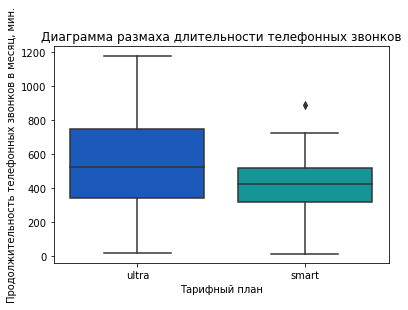

In [78]:
ax = sns.boxplot(x='tariff', y='sum_duration', data=df_calls_mean, palette='winter')
ax.set(xlabel='Тарифный план', ylabel='Продолжительность телефонных звонков в месяц, мин.', title='Диаграмма размаха длительности телефонных звонков')
fig = ax.get_figure()

Диаграмма размаха отражает, что медианное значение длительности телефонных разговоров для пользователей тарифного плана Ультра больше, чем пользователей тарифного плана Смарт ( примерно 530 и 410 минут в месяц соответсвенно). Кроме того, поведение пользователей тарифного плана Ультра более разнообразно (от 0 до 1200 минут разговоров в месяц),в то время как для тарифного плана Смарт характерен меньший разброс (примерно от 0 до 750 минут).
Отдельно стоит рассмотреть тот факт, что на тарифе Смарт есть пользователи, длительность телефонных разговоров выходит за границы размаха. Таким пользователям можно было бы порекомендовать рассмотреть более подходящие тарифные планы.

In [79]:
df_calls_mean.groupby('tariff')['sum_duration'].mean()

tariff
smart    420.848019
ultra    546.998401
Name: sum_duration, dtype: float64

Расчет средней продолжительности разговора для каждого тарифного плана составляет 420 минут для тарифа Смарт и 546 минут для тарифа Ультра, что достаточно близко к медианным значениям, отраженных на диаграмме размаха.

Для целей дальнейшего исследования разделим нашу выборку на _df_calls_mean_ultra_ - среднемесячная длительность телефонных звонков для пользователей тарифа Ультра и _df_calls_mean_smart_ - аналогичный показатель для пользователей тарифа Смарт.

In [80]:
df_calls_mean_ultra = df_calls_mean.query('tariff == "ultra"')

In [81]:
df_calls_mean_ultra.head()

,sum_duration,tariff
user_id,,
1000,320.750,ultra
1003,764.400,ultra
1004,123.375,ultra
1013,468.000,ultra
1016,61.000,ultra


In [82]:
df_calls_mean_smart = df_calls_mean.query('tariff == "smart"')

Рассчитаем дисперсию и стандартное отклонение длительности звонков для обоих тарифов

In [83]:
calls_ultra_variance = np.var(df_calls_mean_ultra['sum_duration'])
calls_ultra_variance

71369.46525889802

In [84]:
calls_smart_variance = np.var(df_calls_mean_smart['sum_duration'])
calls_smart_variance

20519.31269910389

Стандартное отклонение

In [85]:
calls_ultra_stdev = np.std(df_calls_mean_ultra['sum_duration'])
calls_ultra_stdev

267.15064150942635

In [86]:
calls_smart_stdev = np.std(df_calls_mean_smart['sum_duration'])
calls_smart_stdev

143.24563762678392

Стандартное отклонение длительности телефонных разговоров на тарифе Ультра почти в два раза больше чем стандартное отклонение на тарифе Смарт. С практической точки зрения, можно сказать что клиентское поведение абонентов тарифа Смарт более предсказуемое - разность между абонентом, разговаривающим меньше всех и больше всех меньше, чем для пользователей тарифа Ультра.

С другой стороны, количество включенных в тариф минут разговора для тарифа Ультра значительно больше (до 3000 минут) - это изначально предполагает, что разность в длительности телефонных разговоров будет значительная.

Построим распределение длительности телефонных звонков в месяц для тарифа Ультра.
Для удобства восприятия дальнейших графиков - данные тарифа Ультра будут представлены синим цветом, данные тарифа Смарт - зеленым.

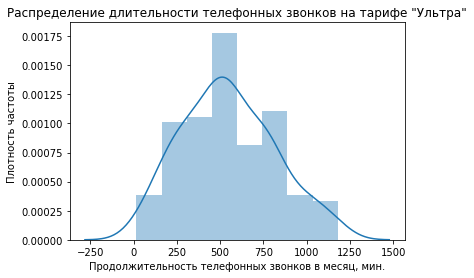

In [87]:
ax = sns.distplot(df_calls_mean_ultra['sum_duration'])
ax.set(xlabel='Продолжительность телефонных звонков в месяц, мин.', ylabel='Плотность частоты', title='Распределение длительности телефонных звонков на тарифе "Ультра"')
fig = ax.get_figure()

Продолжительность телефонных разговоров для тарифа Ультра имеет нормальное распределение, с небольшой скошенностью влево. Однако, по условиям тарифного плана включено 3000 минут телефонного разговора. На нашей гистограмме плотности отражено, что в общем длительность телефонных разговоров достигает максимум 1200 минут. То есть абоненты не используют предложенный лимит разговоров даже на половину. 
Можно сделать предположения что:
* а) абоненты не корректно для себя выбирают тариф, 
* б) для абонентов при выборе тарифного плана количество минут разговора не стоит на первом месте в рейтинге важности критериев.
* в) некоторое количество абонентов предпоччитает купить более дорогой тарифный план и не думать об ограничениях совсем

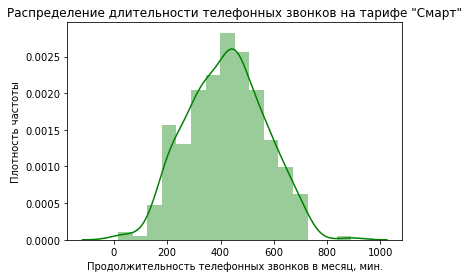

In [88]:
ax = sns.distplot(df_calls_mean_smart['sum_duration'], color='g')
ax.set(xlabel='Продолжительность телефонных звонков в месяц, мин.', ylabel='Плотность частоты', title='Распределение длительности телефонных звонков на тарифе "Смарт"')
fig = ax.get_figure()

Длительность телефонных разговоров на тарифе Смарт имеет нормальное распределение. Однако, тарифный план Смарт включает в себя 500 минут телефонных разговоров. А распределение демонстрирует что есть достаточно существенная часть клиентов, длительность разговоров которых превышает 500 минут - соответственно клиент доплачивает за каждую минуту разговора. Нужно оценить насколько используются другие услуги (такие как сообщения и интернет), но предварительно можно было бы предложить клиентам перейти на другой - более крупный тарифный план. 

Посмотрим распределение обоих тарифных планов вместе.

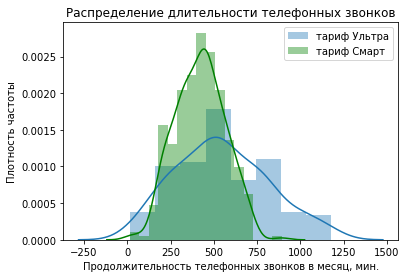

In [89]:
ax = sns.distplot(df_calls_mean_ultra['sum_duration'], label='тариф Ультра')
ax = sns.distplot(df_calls_mean_smart['sum_duration'], label='тариф Смарт', color='g')
ax.set(xlabel='Продолжительность телефонных звонков в месяц, мин.', ylabel='Плотность частоты', title='Распределение длительности телефонных звонков')
ax.legend()
fig = ax.get_figure()

Распределение обоих тарфиных планов отражает, что для тарифа Смарт это распределение нормальное, а для тарифа Ультра есть некоторая скошенность в сторону 0. Важно отметить то, что при большой разности включенных минут разговоров (3000 минут для тарифа Ультра и 500 - для Смарт) их средние значения фактического использования очень близки. То есть, пользователи тарифного плана Смарт используют включенные минуты разговора на 100%, а пользователи тарифа Ультра - примерно на 20%. Коммерческому департаменту (заказчику данного исследования) стоит порекомендовать при рекламе тарифа Ультра не делать упор на количество минут разговора.

Проанализируем достаточность тарифных планов в отношении телефонных звонков. Добавим в таблицу _df_calls_dur_ столбец _used_c_ в который рассчитаем какую долю запланированных минут разговоров использует каждый пользователь. 

In [90]:
df_calls_dur['used_c'] = df_calls_dur['sum_duration'] / df_calls_dur['minutes_included']

In [91]:
df_used_minutes = df_calls_dur.pivot_table(index='user_id', values=('used_c', 'tariff'), aggfunc={'used_c':'mean', 'tariff':'first'})
df_used_minutes.head()

,tariff,used_c
user_id,,
1000,ultra,0.106917
1001,smart,0.844000
1002,smart,0.433429
1003,ultra,0.254800
1004,ultra,0.041125


Найдем медианное значение показателя "доля используемых минут разговоров" для каждого тарифного плана.

In [92]:
df_used_minutes.groupby('tariff')['used_c'].median()

tariff
smart    0.850500
ultra    0.175167
Name: used_c, dtype: float64

Предположения на основе гистограммы плотностей подтвердились, немного скорректировались значения. Абоненты тарифа Смарт используют запланированные минуты телефонных разговоров на 85%, в то время как абоненты тарифа ультра лишь на 17,5%. Вероятно, если на тарифном плане Ультра снизить количество предлагаемых минут разговора - абоненты даже не заметят этого.

Рассчитаем пользователи каких тарифных планов платят чаще сверх тарифного плана, и сколько денег это принесло Компании в 2018 году.

In [93]:
df_calls_dur.pivot_table(index='tariff', values='extra_money_c', aggfunc=('count', 'sum', 'mean'))

,count,mean,sum
tariff,,,
smart,2221.0,125.266547,278217.0
ultra,947.0,0.000000,0.0


Дополнительные деньги сверх абонентской платы приносят звонки только на тарифе Смарт. В 2018 году эти пользователи доплатили сверх абонентской платы 278 217 рублей.
А для тарифа ультра количество заложенных единиц можно считать не только достаточными, но и избыточными.

Рассчитаем сколько кейсов (1 пользователь в 1 месяц) доплаты за телефонные разговоры сверх тарифного плана было.

In [94]:
df_calls_extra_money = df_calls_dur.query('extra_money_c > 0')

In [95]:
len(df_calls_extra_money)

754

In [96]:
df_calls_extra_money['extra_money_c'].median()

300.0

В 2018 году было 754 кейса доплат сверх тарифного плана. И если такие доплаты были, то медианное значение такой доплаты составило 300 рублей. То есть, абонент заплатил за мобильную связь 850 рублей (а планировал 550) - то есть можно предложить ему тариф стоимостью 850 рублей, но более предсказуемый.

#### Отправка сообщений

Составим сводную таблицу, в которой посчитаем сколько сообщений в среднем отправляет каждый пользователь в месяц. И построим диаграмму размаха по этим данным.

In [97]:
df_messages_mean = df_messages_count.pivot_table(index = 'user_id', values = ('messages_number', 'tariff'), aggfunc = {'messages_number':'mean', 'tariff':'first'})

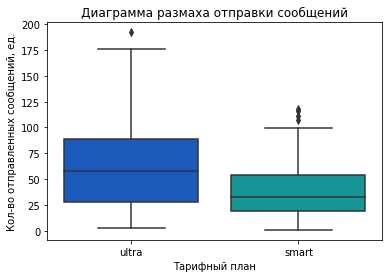

In [98]:
ax = sns.boxplot(x='tariff', y='messages_number', data=df_messages_mean, palette = 'winter')
ax.set(xlabel='Тарифный план', ylabel='Кол-во отправленных сообщений, ед.', title='Диаграмма размаха отправки сообщений')
fig = ax.get_figure()

В тарифный план Ультра включено 1000 сообщений, в тарифный план Смарт - 50 сообщений. Медианные значения составляют около 60 сообщений - для тарифа Ультра и - 35 для тарифа Смарт. И на том и на другом тарифе есть пользователи, которые не пользуются сообщениями совсем. 

Размах использования сообщений на тарие Ультра ограничивается 175 сообщениями, и есть небольшое количество аномальных значений в районе 190 сообщений. Это говорит о том, что из 1000 запланированных сообщений используется менее 20%. То есть, как и количество минутр разговора, количество сообщений не являются критериями выбора для пользователей тарифа Ультра. 

На тарифе Смарт медианное значение на уровне 35 сообщений в месяц, но около 25% пользователей отправляют более 50 сообщений (это все те пользователи, которые отражены выше зеленого прямоугольника). 

Рассчитаем более точно среднее количество сообщений для каждого тарифного плана.

In [99]:
df_messages_mean.groupby('tariff')['messages_number'].mean()

tariff
smart    37.575606
ultra    64.555802
Name: messages_number, dtype: float64

На тарифе Смарт отправляют 37 сообщений, на тарифе Ультра - в среднем 64 сообщения. 

In [100]:
df_messages_mean_ultra = df_messages_mean.query('tariff == "ultra"')
df_messages_mean_ultra.head()

,messages_number,tariff
user_id,,
1000,62.0,ultra
1003,76.0,ultra
1004,149.0,ultra
1013,21.0,ultra
1016,71.0,ultra


In [101]:
df_messages_mean_smart = df_messages_mean.query('tariff == "smart"')

Рассмотрим а так ли одинаково клиентское поведение пользователей разных тарифных планов в отношении отправки сообщений. Рассчитаем дисперсию  и стандартное отклонение по количеству сообщений для каждого тарифного плана.

In [102]:
messages_ultra_variance = np.var(df_messages_mean_ultra['messages_number'])
messages_ultra_variance

1867.5617883826287

In [103]:
messages_smart_variance = np.var(df_messages_mean_smart['messages_number'])
messages_smart_variance

615.4647631537798

Стандартное отклонение

In [104]:
messages_ultra_stdev = np.std(df_messages_mean_ultra['messages_number'])
messages_ultra_stdev

43.21529576877415

In [105]:
messages_smart_stdev = np.std(df_messages_mean_smart['messages_number'])
messages_smart_stdev

24.808562295179055

Ситуация с отправкой сообщений очень похожа на ситуацию с телефонными разговорами. Стандртное отклонение для тарифного плана Смарт примерно в 1,7 раза меньше стандартного отклонения на тарифе Ультра. Но эти стандартные отклонения не пропорциональны количеству запланированных сообщений. 

Построим распределение количества сообщений для тарифа Ультра.

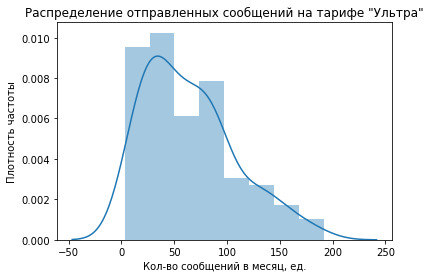

In [106]:
ax = sns.distplot(df_messages_mean_ultra['messages_number'])
ax.set(xlabel='Кол-во сообщений в месяц, ед.', ylabel='Плотность частоты', title='Распределение отправленных сообщений на тарифе "Ультра"')
fig = ax.get_figure()

Распределение количества сообщений в месяц на тарифе Ультра скошено влево - к 0.

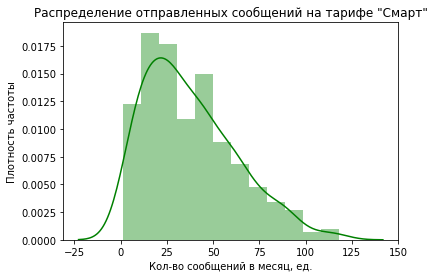

In [107]:
ax = sns.distplot(df_messages_mean_smart['messages_number'], color='g')
ax.set(xlabel='Кол-во сообщений в месяц, ед.', ylabel='Плотность частоты', title='Распределение отправленных сообщений на тарифе "Смарт"')
fig = ax.get_figure()

Распределение количества сообщений на тарифе Смарт - скошено влево к 0.

Нанесем распределения на один график.

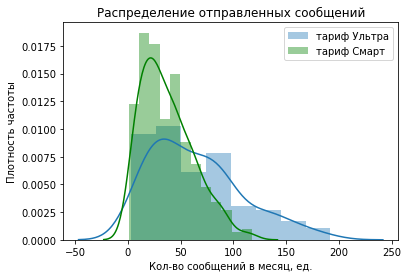

In [108]:
ax = sns.distplot(df_messages_mean_ultra['messages_number'], label='тариф Ультра')
ax = sns.distplot(df_messages_mean_smart['messages_number'], label='тариф Смарт', color='g')
ax.set(xlabel='Кол-во сообщений в месяц, ед.', ylabel='Плотность частоты', title='Распределение отправленных сообщений')
ax.legend()
fig = ax.get_figure()

Распределение количества сообщений на обоих тарифных планах скошено влево - к 0. Это отражает что достаочно много пользователей не интересуются сообщениями.

Изучим насколько полно используются запланированные тарифные планы.

In [109]:
df_messages_count['used_m'] = df_messages_count['messages_number'] / df_messages_count['messages_included']

In [110]:
df_used_messages = df_messages_count.pivot_table(index='user_id', values=('used_m', 'tariff'), aggfunc={'used_m':'mean', 'tariff':'first'})
df_used_messages.head()

,tariff,used_m
user_id,,
1000,ultra,0.062
1002,smart,0.200
1003,ultra,0.076
1004,ultra,0.149
1005,smart,0.920


In [111]:
df_used_messages.groupby('tariff')['used_m'].median()

tariff
smart    0.6600
ultra    0.0578
Name: used_m, dtype: float64

Ситуация с сообщениями на тарифных планах распределилась похожим с телефонными разговорам. На тарифе ультра используют лишь 5,7% от запланированного количества смс. В рекламных компаниях явно не стоит делать упор на количество смс - очевидно это не самое популярное направление у пользователей. 

Посмотрим приносит ли это какие-то дополнительные деньги

In [112]:
df_messages_count.pivot_table(index='tariff', values='extra_money_m', aggfunc=('count', 'sum', 'mean'))

,count,mean,sum
tariff,,,
smart,1922.0,20.17898,38784.0
ultra,795.0,0.00000,0.0


In [113]:
df_messages_extra_money = df_messages_count.query('extra_money_m > 0')

In [114]:
len(df_messages_extra_money)

564

In [115]:
df_messages_extra_money['extra_money_m'].median()

55.5

Сверх тарифного плана за сообщения доплачивают только пользователи тарифного плана Смарт. За 2018 год таких кейсов было 564(1 человек в 1 месяц). И если доплата и происходит, то в среднем (точнее в медианном значении) доплата составляет 55.5 рублей.

#### Интернет-трафик

Составим сводную таблицу, в которой отразим какое количество интернет-трафика использует каждый абонент в месяц. И построим диаграмму размаха.

In [116]:
df_internet_mean = df_internet_value.pivot_table(index = 'user_id', values = ('mb_used', 'tariff'), aggfunc = {'mb_used':'mean', 'tariff':'first'})
df_internet_mean.head()

,mb_used,tariff
user_id,,
1000,13436.500000,ultra
1001,16252.500000,smart
1002,16597.571429,smart
1003,11465.800000,ultra
1004,18646.500000,ultra


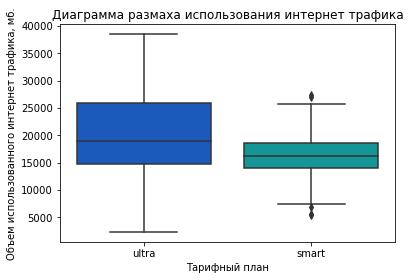

In [117]:
ax = sns.boxplot(x='tariff', y='mb_used', data=df_internet_mean, palette='winter')
ax.set(xlabel='Тарифный план', ylabel='Объем использованного интернет трафика, мб.', title='Диаграмма размаха использования интернет трафика')
fig = ax.get_figure()

В тарифный план Ультра включено 30 Гб. интернет трафика, для тарифа Смарт - 15 Гб. 
Согласно диаграмме размаха медианное значение для пользователей тарифного плана Ультра составляет около 19 000 мб(около 18.5Гб) - это немного больше чем половина запланированного трафика, для тарифного плана Смарт - 16000мб(15.6Гб.) - это больше тарифного плана. То есть более половины абонентов тарифного плана Смарт используют интернета больше, чем предусмотрено тарифным планом. 

In [118]:
df_internet_mean.groupby('tariff')['mb_used'].mean()

tariff
smart    16237.003015
ultra    19762.435602
Name: mb_used, dtype: float64

Если быть более точными, то на тарифе Смарт ежемесячно используют 16 237 мб. = 15.8 Гб. На тарифе Ультра - 19.3 Гб. Очевидно, что для обоих тарифных планов интернет - это наиболее популярная услуга. И именно стоимость интернета будет являться ключевым критерием при выборе того или иного тарифного плана. 

In [119]:
df_internet_mean_ultra = df_internet_mean.query('tariff == "ultra"')
df_internet_mean_ultra.head()

,mb_used,tariff
user_id,,
1000,13436.5,ultra
1003,11465.8,ultra
1004,18646.5,ultra
1013,15272.5,ultra
1016,13417.0,ultra


In [120]:
df_internet_mean_smart = df_internet_mean.query('tariff == "smart"')
df_internet_mean_smart.head()

,mb_used,tariff
user_id,,
1001,16252.500000,smart
1002,16597.571429,smart
1005,8317.750000,smart
1006,14945.000000,smart
1007,14643.555556,smart


Изучим как различается клиентское поведение пользователей различных тарифных планов. Рассчитаем дисперсию и стандартное отклонение объема используемого интернет - трафика в месяц.

In [121]:
internet_ultra_variance = np.var(df_internet_mean_ultra['mb_used'])
internet_ultra_variance

66414723.66268307

In [122]:
internet_smart_variance = np.var(df_internet_mean_smart['mb_used'])
internet_smart_variance

13118523.302409772

In [123]:
internet_ultra_stdev = np.std(df_internet_mean_ultra['mb_used'])
internet_ultra_stdev

8149.522910126891

In [124]:
internet_smart_stdev = np.std(df_internet_mean_smart['mb_used'])
internet_smart_stdev

3621.9502070583153

Стандартное отклонение для тарифного плана Ультра составляет 8150 Мб. (около 8 Гб.), для тарифного плана Смарт - 3621 Мб. (3.5 Гб.). 

Построим распределение используемого интернет трафика для тарифа Ультра

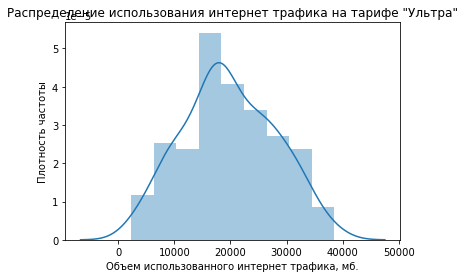

In [125]:
ax = sns.distplot(df_internet_mean_ultra['mb_used'])
ax.set(xlabel='Объем использованного интернет трафика, мб.', ylabel='Плотность частоты', title='Распределение использования интернет трафика на тарифе "Ультра"')
fig = ax.get_figure()

Распределение нормльное, с некоторой скошенностью в право. Построим распределение для тарифа Смарт

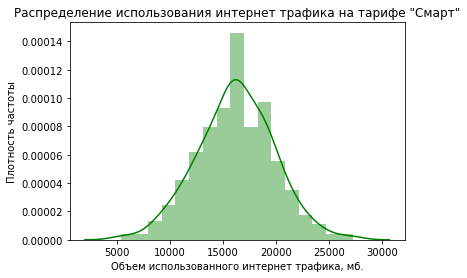

In [126]:
ax = sns.distplot(df_internet_mean_smart['mb_used'], color='g')
ax.set(xlabel='Объем использованного интернет трафика, мб.', ylabel='Плотность частоты', title='Распределение использования интернет трафика на тарифе "Смарт"')
fig = ax.get_figure()

Распределение на тарифном плане Смарт нормальное.
Посмотрим распределения вместе.

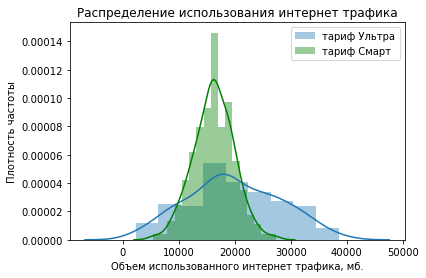

In [127]:
ax = sns.distplot(df_internet_mean_ultra['mb_used'], label='тариф Ультра')
ax = sns.distplot(df_internet_mean_smart['mb_used'], label='тариф Смарт', color='g')
ax.set(xlabel='Объем использованного интернет трафика, мб.', ylabel='Плотность частоты', title='Распределение использования интернет трафика')
ax.legend()
fig = ax.get_figure()

Клиенское поведение пользователей тарифа Смарт более однородное, чем поведение пользователей тарифа Ультра. 
Однако интернет - это явно наиболее ценная часть тарифного плана Ультра, потому что в отличие от телефонных звонков и сообщений запланированный трафик используется полно, часто даже сверх тарифа.

Рассмотрим достаточно ли запланированного тарифным планом интернет трафика - для этого для каждого пользователя рассчитаем какую долю запланированного трафика он использует в месяц.

In [128]:
df_internet_value['used_i'] = df_internet_value['mb_used'] / df_internet_value['mb_per_month_included']

In [129]:
df_used_internet = df_internet_value.pivot_table(index='user_id', values=('used_i', 'tariff'), aggfunc={'used_i':'mean', 'tariff':'first'})
df_used_internet.head()

,tariff,used_i
user_id,,
1000,ultra,0.437386
1001,smart,1.058105
1002,smart,1.080571
1003,ultra,0.373236
1004,ultra,0.606982


In [130]:
df_used_internet.groupby('tariff')['used_i'].median()

tariff
smart    1.060501
ultra    0.618587
Name: used_i, dtype: float64

Половина пользователей тарифа Ультра используют 61% или более от запланированного трафика. На тарифе Смарт - более половины пользователей используют тарифный план на 106% или более, а значит более половины пользователей тарифного плана Смарт доплачивют за интернет сверх тарифного плана.

Рассчитаем сколько денег это приносит Компании

In [131]:
df_internet_value.pivot_table(index='tariff', values='extra_money_i', aggfunc=('count', 'sum', 'mean'))

,count,mean,sum
tariff,,,
smart,2227,602.963628,1342800.0
ultra,974,122.433265,119250.0


In [132]:
df_internet_extra_money = df_internet_value.query('extra_money_i > 0')
df_internet_extra_money.pivot_table(index='tariff', values='extra_money_i', aggfunc=('count', 'median'))

,count,median
tariff,,
smart,1309,800.0
ultra,134,750.0


Пользователи тарифа Ультра доплатили сверх тарифного плана 119250 рублей в 2018 году, пользователи тарифа Смарт  1342800 рублей.

И если пользователь на тарифе Ультра доплачивает сверх тарифа, то эта сумма составляет 750 рублей (медианное значение), для пользователя Смарт - 800 рублей. Получается, что для некоторых пользователей тарифа Смарт итоговая стоимость услуг мобильной связи обходится в 1350 рублей.

#### Приобретение дополнтельных услуг сверх тарифного плана

Проанализируем насколько полно используются тарифные планы. Уточним достаточно ли абонентам запланированных минут телефонного разговора, или излишни, или может не хватает. А если не хватает, тогда как часто приходится доплачивать сверх тарифного плана.

In [133]:
df_users['income'].sum()

777617

В среднем, 500 абонентов из нашей выборки приносят компании 776817 рублей в месяц (включая абонентскую плату и доплаты сверх тарифа)

In [134]:
df_users.pivot_table(index='tariff', values='income', aggfunc=('sum', 'median', 'count'))

,count,median,sum
tariff,,,
smart,351,1176,466740
ultra,149,1950,310877


В представленной выборке 351 человек - это пользователь тарифа Смарт, Средний чек пользователя составляет 1176 рублей (из которых 550 рублей - это абонентская плата)

149 человек - пользователи тарифа Ультра, и их средний чек составляет 1950 рублей, что соответсвует размеру абонентской платы.

То есть получается, что 30% пользователей (пользователи тарифа Ультра) приносят Компании 40% дохода, при этом не совершая значительных доплат сверх тарифного плана.

Некоторые пользователи тарифа Смарт сделали свой выбор тарифного плаана не рационально: доплаты сверх тарифного плана настолько большие, что итоговая стоимость превышает стоимость абонентской платы Ультра. Рассчитаем как много таких пользователей.

In [135]:
len(df_users.query('tariff == "smart" and income >= 1950'))

49

В представленной выборке 49 человек (а это почти 10% всей выборки) подписанны на тариф Smart, однако с учетом всевозможных доплат сверх тарифного плана их среднемесячные расходы равны или превышают абонентскую плату по тарифу Ультра. Для них было бы гораздо выгоднее перейти на тариф Ультра. Это не принесет дополнительных денег Компании. Но предложение перейти на более соразмерный тариф повысит лояльность клиентов.

In [136]:
len(df_users.query('tariff == "smart" and 1800 <= income < 1950'))

21

21 абоненту можно предложить перейти с тарифа Смарт на тариф Ультра. Компании это принесет дополнительные 3150 рублей в месяц.

**Общий вывод**

Пользователям тарифа Смарт, с большими доплатами (общая стоимость связи для которых превышает 1950 рублей) стоит перевести на тариф Ультра. Это позволит Компании более рационально планировать необходимые мощности, увеличит круг пользователей подписанных на более дорогой тарифный план.

Стоит разработать промежуточные тарифные планы например стоимостью 850 рублей (который будет включать 600 минут разговора и 17 Гб. интернет трафика и 1000 рублей (который будет включать 700 минут разговора и 20Гб. интернет трафика).

## Проверка гипотез

### Средняя выручка пользователей тарифов "Ультра" и "Смарт" равны

В качестве нулевой гипотезы будем считать, что __Средняя выручка пользователей тарифов "Ультра" и "Смарт" равны__ . Проверим ее методом t-распределения.Для этого сформируем два среза: выручка на тарифе Ультра в среднем в месяц и аналогичные данные для тарифа Смарт. 

In [137]:
df_income_ultra = df_users.query('tariff == "ultra"')
df_income_smart = df_users.query('tariff == "smart"')

Для целей данного исследования параметр стаистической значимости _alpha_ - примем равный 5%. Рассчитаем значение дисперсии для обоих срезов, чтобы уточнить можем ли мы считать дисперсии равными в рамках t-test параметр 

In [138]:
np.var(df_income_ultra['income'])

89375.07625782609

In [139]:
np.var(df_income_smart['income'])

375127.2220030682

Дисперсии выборок различаются значительно, поэтому параметр равных дисперсий (equal_var) укажем как False 

In [140]:
alpha = 0.05
results = st.ttest_ind(df_income_ultra['income'], df_income_smart['income'], equal_var = False)
results.pvalue

3.0953236210156043e-58

In [141]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


**Вывод**

t-тестирование показало, что на основе имеющейся выборки, гипотеза "средняя выручка пользователей тарифов Ультра и Смарт равны" опровергнута, а значит альтернативная гипотеза о том что средние выручки различаются не противоречит данным нашей выборки.

### Средняя выручка пользователей из Москвы равна средней выручки пользователей других регионов

Нулевой гипотезой будем считать, что __Средняя выручка пользователей из Москвы равна средней вручке пользователей из других регионов__. Но если нулевая гипотеза будет опровергнута - будем считать, что Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов(альтернативная гипотеза).

In [142]:
df_income_moscow = df_users.query('city == "Москва"')
df_income_no_moscow = df_users.query('city != "Москва"')

In [143]:
alpha_1 = 0.05
results_1 = st.ttest_ind(df_income_moscow['income'], df_income_no_moscow['income'])
results_1.pvalue

0.37223875682173835

In [144]:
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


In [145]:
df_income_moscow['income'].median()

1629.0

In [146]:
df_income_no_moscow['income'].median()

1620.0

**Вывод**

Оценка гипотезы на представленной выборке не дала нам оснований отвергнуть нулевую гипотезу, поэтому мнение, что Средняя выручка пользователей из Москвы равна средней вручке пользователей из других регионов не отвергнуто.

## Общий вывод

В нашем исследовании использовалась выборка из 500 абонентов компании Мегалайн и данные об их звонках, сообщениях и интернет трафике за 2018 год. 30% абонентов выборки являются пользователями тарифа Ультра (абонентская плата 1950 рублей, включает 3000 минут разговора, 1000 сообщений и 30Гб. трафка), а остальные 70% - пользователи тарифа Смарт (абонентская плата 550 рублей, включает 500 минут разговора, 50 сообщений и 15 Гб.трафика).

Исследование показало, что для пользователей тарифа Смарт при выборе тарифного плана важен баланс между достаточным количеством минут разговора, достаточным количеством сообщений и интернет трафика. Одновременно с этим, каждый второй пользователь тарифа Смарт доплачивает за интернет сверх тарифного плана. С целью удержания заинтересованности пользователей в этом тарифном плане в можно рассмотреть вариант, чтобы клиент сам выбирал наполнение тарифа в рамках абонентской платы, как конструктор. Например: часть запланированных сообщений отдать в пользу какого-то количества интернет трафика. Это не принесет Компании дополнительных денег, которые сейчас оназарабатывает на сверхтрафике. Но клиент, понимая что он сам управляет своим портфелем с большей вероятностью перейдет на более дорогой тарифный план, и не будет испытывать ощущения, что покупает не нужную ему услугу.

Что касается тарифа Ультра - абоненты используют лишь 5,7% от запланированного количества сообщений и 17% от запланированныхминут разговоров, но охотно используют интернет трафик (61% от запланированного, хотя бы 1 раз в год каждый клиент доплачивает за интернет сверх трафика около 750 рублей). Рекомендуется в рекламе тарифа  ультра делать упор на интернет, потому как количество сообщений и минут разговора либо не в приоритете у клиента, либо сейчас в избыточном предложении в тарифном плане.

Пользователям тарифа Смарт, с большими доплатами (общая стоимость связи для которых превышает 1950 рублей) стоит перевести на тариф Ультра. Это позволит Компании более рационально планировать необходимые мощности, увеличит круг пользователей подписанных на более дорогой тарифный план. таких пользователей около 10% выборки. 

Возможно, стоит разработать промежуточные тарифные планы, например, стоимостью 850 рублей (который будет включать 600 минут разговора и 17 Гб. интернет трафика и 1000 рублей (который будет включать 700 минут разговора и 20Гб. интернет трафика). Опять же это не принесет компании непредсказуемых денег сверх тарифного плана, но сохранит лояльность клиентов к оператору в целом (нет ощущения, что я плачу и абонентскую плату и деньги все равно куда-то деваются), и позволит обоснованно рассчитать технические мощности. 

В заключении постараемся ответить на 2 вопроса, поставленные заказчиком перед нами:
1. какой из тарифных планов более выгодный Компании? - выгодны все, когда они подобраны абоненту, исходя из его клиентского поведения. Да, средний чек абонента на тарифе Ультра выше среднего чека абонента на тарифе Смарт. Да, в общей сложенности, пользователи тарифа ультра составляют 30% выборки, но приносят 40% денег. Но пользователи тарифа Смарт отличаются своим клиентским поведением от пользователей тарифа Ультра, значит и испытывает другие потребности. Кроме того, ряд пользователей нужно перевести со Смарт на Ультра.
2. как коммерческому департаменту скорректировать рекламные бюджеты? на этот вопрос сложно ответить, так как у нас нет данных о рекламных бюджетах. Но то, что клиенты тарифа Смарт любят баланс между услугами (а в идеале настраивать этот баланс самому), то клиенты тарифа Ультра интересуются в основном интернетом, и их мало интересует сколько минут разговора (а уж тем более сообщений) они приобретают и рационально ли используют. Они смотрят только на количество трафика, включенного в тарифный план.
